## Observations and Insights 

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
##outer including nons otherwise inner default and deletes nons
##when using a common variable name left and rights, have to loo up how to do multiple matches
# Display the data table for preview
combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [103]:
# Checking the number of mice.
print(combined_mouse_df['Mouse ID'].count())
print(combined_mouse_df['Mouse ID'].nunique())

1893
249


In [104]:

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = combined_mouse_df[combined_mouse_df.duplicated(keep=False)]

# duplicate = combined_mouse_df[combined_mouse_df.duplicated(['Mouse ID', 'Timepoint'], keep='last') #gets rid of the first duplicate
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [105]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = combined_mouse_df[combined_mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [106]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_mouse_df.drop(combined_mouse_df[combined_mouse_df['Mouse ID']=='g989'].index)


In [107]:
# Checking the number of mice in the clean DataFrame.

print(clean_df['Mouse ID'].count())
print(clean_df['Mouse ID'].nunique())

1880
248


## Summary Statistics

In [108]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
print(mean)
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
print(median)
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
(variance)
standarddev = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
print(standarddev)
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
print(sem)


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     

In [109]:
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Standard Deviation': standarddev, 'SEM': sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    {"mean", "median", "var", "std", "sem"})

,sem,median,std,mean,var
Drug Regimen,,,,,
Capomulin,0.329346,41.557809,4.994774,40.675741,24.947764
Ceftamin,0.469821,51.776157,6.268188,52.591172,39.290177
Infubinol,0.492236,51.820584,6.567243,52.884795,43.128684
Ketapril,0.603860,53.698743,8.279709,55.235638,68.553577
Naftisol,0.596466,52.509285,8.134708,54.331565,66.173479
Placebo,0.581331,52.288934,7.821003,54.033581,61.168083
Propriva,0.544332,50.446266,6.622085,52.320930,43.852013
Ramicane,0.320955,40.673236,4.846308,40.216745,23.486704
Stelasyn,0.573111,52.431737,7.710419,54.233149,59.450562


## Bar and Pie Charts

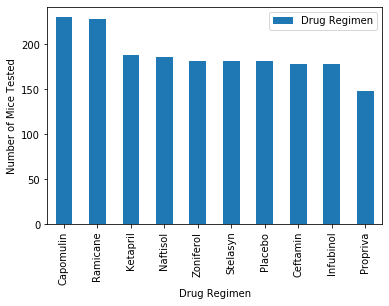

In [111]:
# Generate a bar plot showing the total number of timepoints for all mice 
#tested for each drug regimen using Pandas.
counts = pd.DataFrame(clean_df['Drug Regimen'].value_counts())
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

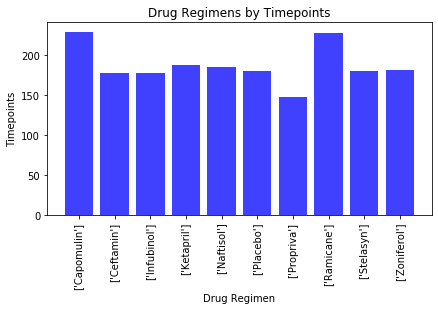

In [112]:
# Generate a bar plot showing the total number of timepoints for all mice 
#tested for each drug regimen using pyplot.
drug_df = clean_df.groupby('Drug Regimen')
drugs = drug_df['Drug Regimen'].unique()
drugs
x_axis = np.arange(len(drug_df['Drug Regimen']))
y_axis = drug_df['Timepoint'].count()
plt.bar(x_axis, y_axis, color='blue', align='center', alpha=0.75)
tick_labels = (drugs)
plt.xticks(x_axis, tick_labels, rotation = 'vertical')
plt.tight_layout()
plt.title("Drug Regimens by Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()


(-1.1065502689644005,
 1.1003119175697333,
 -1.1079114197007642,
 1.1041200173094385)

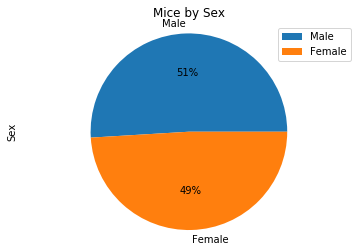

In [113]:
# Generate a pie plot showing the distribution of female versus male mice 
#using Pandas

sex_counts = pd.DataFrame(clean_df['Sex'].value_counts())
sex_counts.plot(kind="pie", subplots=True, autopct='%.0f%%')
plt.title("Mice by Sex")
plt.axis("equal")

Male      958
Female    922
Name: Sex, dtype: int64


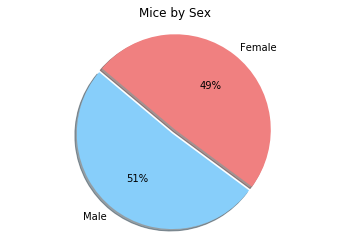

In [114]:
# Generate a pie plot showing the distribution of female versus male mice 
#using pyplot
sex = clean_df["Sex"].value_counts()
labels = ["Male", "Female"]
print(sex)
explode = (0.05, 0)
colors= ["lightskyblue", "lightcoral"]
plt.pie(sex, explode = explode, labels=labels, colors=colors,
        autopct='%.0f%%', shadow=True, startangle=140)
plt.title("Mice by Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [118]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time_df = clean_df.groupby("Mouse ID")['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_df = pd.merge(max_time_df, clean_df, how='inner', on='Mouse ID')

tumor_df = tumor_df.query("Timepoint_x == Timepoint_y")
del tumor_df['Timepoint_y']
tumor_complete = tumor_df.rename(index=str, columns={"Timepoint_x": "Timepoint"})
tumor_complete.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,67.973419,2
19,a251,45,Infubinol,Female,21,25,65.525743,1
29,a262,45,Placebo,Female,17,29,70.717621,4
39,a275,45,Ceftamin,Female,20,28,62.999356,3
46,a366,30,Stelasyn,Female,16,29,63.440686,1


In [140]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_complete["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile: {lowerq}")
print(f"The upper quartile: {upperq}")
print(f"The interquartile range: {iqr}")
print(f"The the median: {quartiles[0.5]} ")

# Locate the rows which contain mice on each drug and get the tumor volumes

four_regimens_df = tumor_complete.drop(tumor_complete[tumor_complete['Drug Regimen']=="Ketapril,Naftisol,Zoniferol,Stelasyn,Placebo,Propriva"].index)
# four_regimens_df.head()   


# add subset 
Capomulin = four_regimens_df.loc[four_regimens_df['Drug Regimen']=='Capomulin']
Ramicane = four_regimens_df.loc[four_regimens_df['Drug Regimen']=='Ramicane']
Infubinol = four_regimens_df.loc[four_regimens_df['Drug Regimen']=='Infubinol']
Ceftamin = four_regimens_df.loc[four_regimens_df['Drug Regimen']=='Ceftamin']
# Determine outliers using upper and lower bounds
    
outliers = four_regimens_df.loc[(four_regimens_df["Tumor Volume (mm3)"]<lowerq) | (four_regimens_df["Tumor Volume (mm3)"]>upperq)]
outliers

The lower quartile: 45.87586684749999
The upper quartile: 65.05362410500001
The interquartile range: 19.17775725750002
The the median: 55.793278175 


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,67.973419,2
19,a251,45,Infubinol,Female,21,25,65.525743,1
29,a262,45,Placebo,Female,17,29,70.717621,4
56,a401,45,Zoniferol,Female,8,25,66.794156,4
66,a411,45,Ramicane,Male,3,22,38.407618,1
...,...,...,...,...,...,...,...,...
1812,y769,45,Ceftamin,Female,6,27,68.594745,4
1822,y793,45,Capomulin,Male,17,17,31.896238,2
1849,z578,45,Ramicane,Male,11,16,30.638696,0
1869,z795,45,Naftisol,Female,13,29,65.741070,3


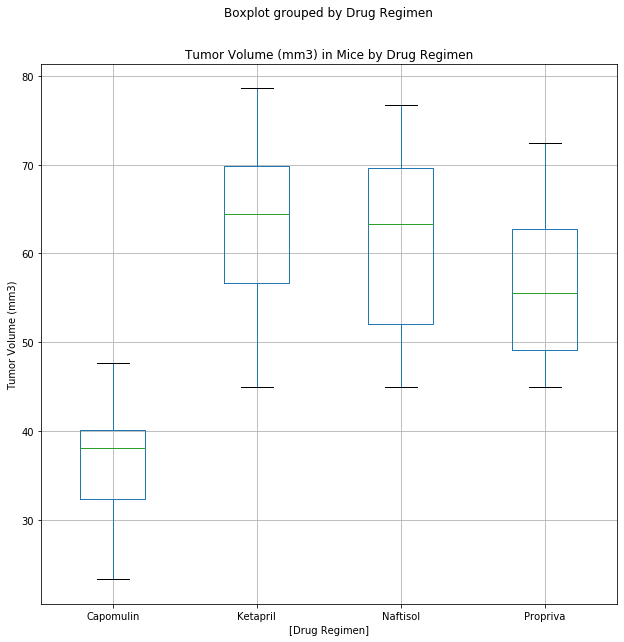

In [152]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_data = four_regimens_df[four_regimens_df['Drug Regimen'].isin(four_regimens_df['Drug Regimen'].unique()[-4:])]
plot_data = plot_data[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)']]
plot_data.boxplot(by='Drug Regimen',grid=True,figsize=(10,10))
plt.title('Tumor Volume (mm3) in Mice by Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

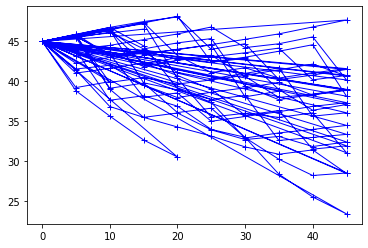

In [160]:
# Generate a line plot of tumor volume vs. time point for a mouse treated 
#with Capomulin
Capomulin_df = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
y_axis = Capomulin_df['Tumor Volume (mm3)']
x_axis = Capomulin_df['Timepoint']
plt.plot(x_axis, y_axis, marker="+",color="blue", linewidth=1, label="Fahreneit")
#convert back into a dataframe

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin ='Capomulin'
capo_df = drug_df.loc[Capomulin]

x_axis = capo_df['Tumor Volume (mm3)'].mean()
y_axis = capo_df['Weight (g)']
#function that changes it back wraps around the group by

## Correlation and Regression

In [153]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Capomulin.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
183,b128,45,Capomulin,Female,9,22,38.982878,2
216,b742,45,Capomulin,Male,7,21,38.939633,0
499,f966,20,Capomulin,Male,16,17,30.485985,0
522,g288,45,Capomulin,Male,3,19,37.074024,1
542,g316,45,Capomulin,Female,22,22,40.159220,2
